# Estatísticas dos parâmetros de um modelo

1. Faça uma função que receba como entrada uma rede neural e retorne um dicionário no qual cada chave é o nome de um parâmetro do modelo e os respectivos valores são:
    * O maior e menor valor do parâmetro;
    * O maior e menor valor do gradiente do parâmetro;
2. Faça uma função que receba o dicionário de 1 e retorne o menor e maior valor dentre todos os parâmetros e todos os gradientes (4 valores no total);
2. Modifique o script de treinamento visto nas aulas para plotar além da loss e da acurácia, os menores e maiores valores retornados em 2. Crie um terceiro gráfico (além do gráfico da loss e acurácia), para mostrar os valores. Os valores devem ser plotados **durante o treinamento da rede**
    

Exemplo

In [1]:
import torch
from torch import nn
from torchvision import models

# Imagem aleatória para ilustração
img = torch.rand(1, 3, 224, 224)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

Exemplo

In [2]:
def max_grad(model):
    """Máximo valor de gradiente de cada parâmetro."""

    stats = {}
    # model.named_parameters() retorna os nomes e respectivos parâmetros do
    # modelo
    for param_name, param in model.named_parameters():
        grad = param.grad
        g_max = grad.max()
        stats[param_name] = {'g_max':g_max.item()}

    return stats

# Aplica o modelo
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

max_grad(model)

{'conv1.weight': {'g_max': 0.0006739782402291894},
 'bn1.weight': {'g_max': 0.0005054449429735541},
 'bn1.bias': {'g_max': 0.00013603876868728548},
 'layer1.0.conv1.weight': {'g_max': 0.0003103926428593695},
 'layer1.0.bn1.weight': {'g_max': 0.0004291682271286845},
 'layer1.0.bn1.bias': {'g_max': 0.00023702651378698647},
 'layer1.0.conv2.weight': {'g_max': 0.0001814423594623804},
 'layer1.0.bn2.weight': {'g_max': 0.000414722366258502},
 'layer1.0.bn2.bias': {'g_max': 0.00012626279203686863},
 'layer1.1.conv1.weight': {'g_max': 0.00010104075045092031},
 'layer1.1.bn1.weight': {'g_max': 0.0002903598651755601},
 'layer1.1.bn1.bias': {'g_max': 0.0001800415775505826},
 'layer1.1.conv2.weight': {'g_max': 9.732425678521395e-05},
 'layer1.1.bn2.weight': {'g_max': 0.00027336215134710073},
 'layer1.1.bn2.bias': {'g_max': 0.00019431044347584248},
 'layer2.0.conv1.weight': {'g_max': 0.00017229341028723866},
 'layer2.0.bn1.weight': {'g_max': 0.00029776827432215214},
 'layer2.0.bn1.bias': {'g_max': 

# Estatísticas dos parâmetros de um modelo

1. Faça uma função que receba como entrada uma rede neural e retorne um dicionário no qual cada chave é o nome de um parâmetro do modelo e os respectivos valores são:
    * O maior e menor valor do parâmetro;
    * O maior e menor valor do gradiente do parâmetro;
2. Faça uma função que receba o dicionário de 1 e retorne o menor e maior valor dentre todos os parâmetros e todos os gradientes (4 valores no total);
2. Modifique o script de treinamento visto nas aulas para plotar além da loss e da acurácia, os menores e maiores valores retornados em 2. Crie um terceiro gráfico (além do gráfico da loss e acurácia), para mostrar os valores. Os valores devem ser plotados **durante o treinamento da rede**
    

### Resolução 

**1.** Função que recebe como entrada uma rede neural e retorna um dicionário contendo como chave o nome do parametro do modelo e o maior e menor valor dos parâmetros, bem como dos gradientes dos parêmetros.

In [1]:
import torch
from torch import nn
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import train
import modelstats

In [4]:
seed = 42
torch.manual_seed(seed)
#np.random.seed(seed)

# Criação de um modelo e cálculo dos gradientes como no notebook original
img = torch.rand(1, 3, 224, 224)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Passa a imagem pelo modelo para calcular os scores
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

In [8]:
# --> modelstats.py
stats = modelstats.get_model_stats(model)

stats

{'conv1.weight': {'param_max': 0.14658889174461365,
  'param_min': -0.15462647378444672,
  'grad_max': 0.12116650491952896,
  'grad_min': -0.17929884791374207},
 'bn1.weight': {'param_max': 0.18778230249881744,
  'param_min': -9.894411334698816e-08,
  'grad_max': 0.4627094566822052,
  'grad_min': -0.4819105565547943},
 'bn1.bias': {'param_max': 0.0029581785202026367,
  'param_min': -0.11153683811426163,
  'grad_max': 0.2643754482269287,
  'grad_min': -0.3104579448699951},
 'layer1.0.conv1.weight': {'param_max': 0.054913632571697235,
  'param_min': -0.06566127389669418,
  'grad_max': 0.21705351769924164,
  'grad_min': -0.2417793869972229},
 'layer1.0.bn1.weight': {'param_max': 0.11887775361537933,
  'param_min': -3.0003313167270562e-09,
  'grad_max': 0.2852310538291931,
  'grad_min': -0.41495954990386963},
 'layer1.0.bn1.bias': {'param_max': -1.0329212329907023e-07,
  'param_min': -0.10669831186532974,
  'grad_max': 0.24055998027324677,
  'grad_min': -0.28915199637413025},
 'layer1.0.co

**2.** Função que recebe o dicionário e retorna o valor máximo e mínimo dos parâmetros e gradientes dos parâmetros

In [9]:
# --> modelstats.py
four_stats = modelstats.get_four_stats(model)

four_stats

(-0.32566767930984497,
 0.32566767930984497,
 -0.4819105565547943,
 0.55030757188797)

**3.** 

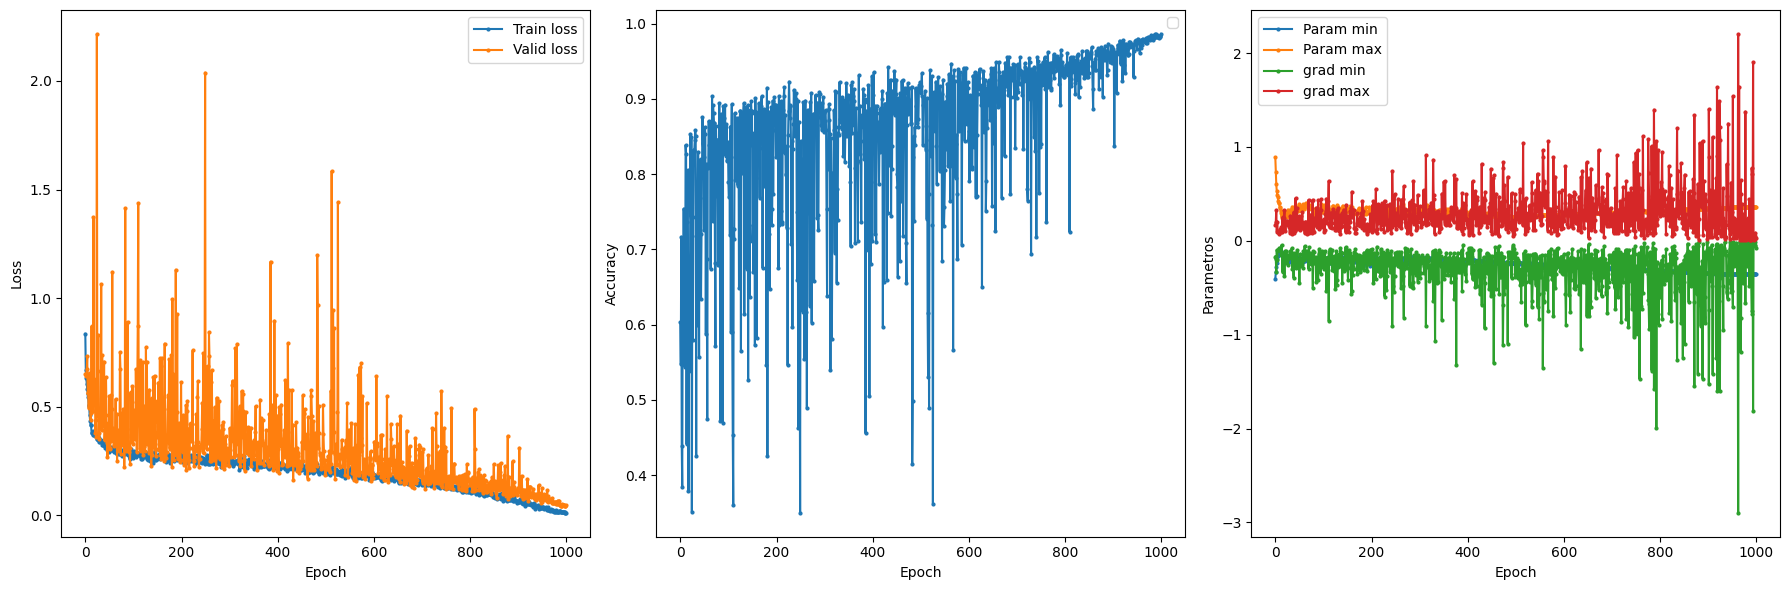

In [3]:
import torch
from torch import nn
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import train
import modelstats

params = {
    #'bs':64,
    'bs':32,
    'num_epochs':1000,
    'lr':0.01,
    'weight_decay':1e-2,
    'resize_size':224,  # Tamanho das imagens de treinamento
    'seed':0
}

model = models.resnet18()
# Modifica a última camada do modelo para classificar em 2 classes
model.fc = nn.Linear(model.fc.in_features, 2)
ds_train, ds_valid, logger = train.train(model, **params)
# Cada época demora em torno de 6.1 segundos em uma RTX3080 Ti

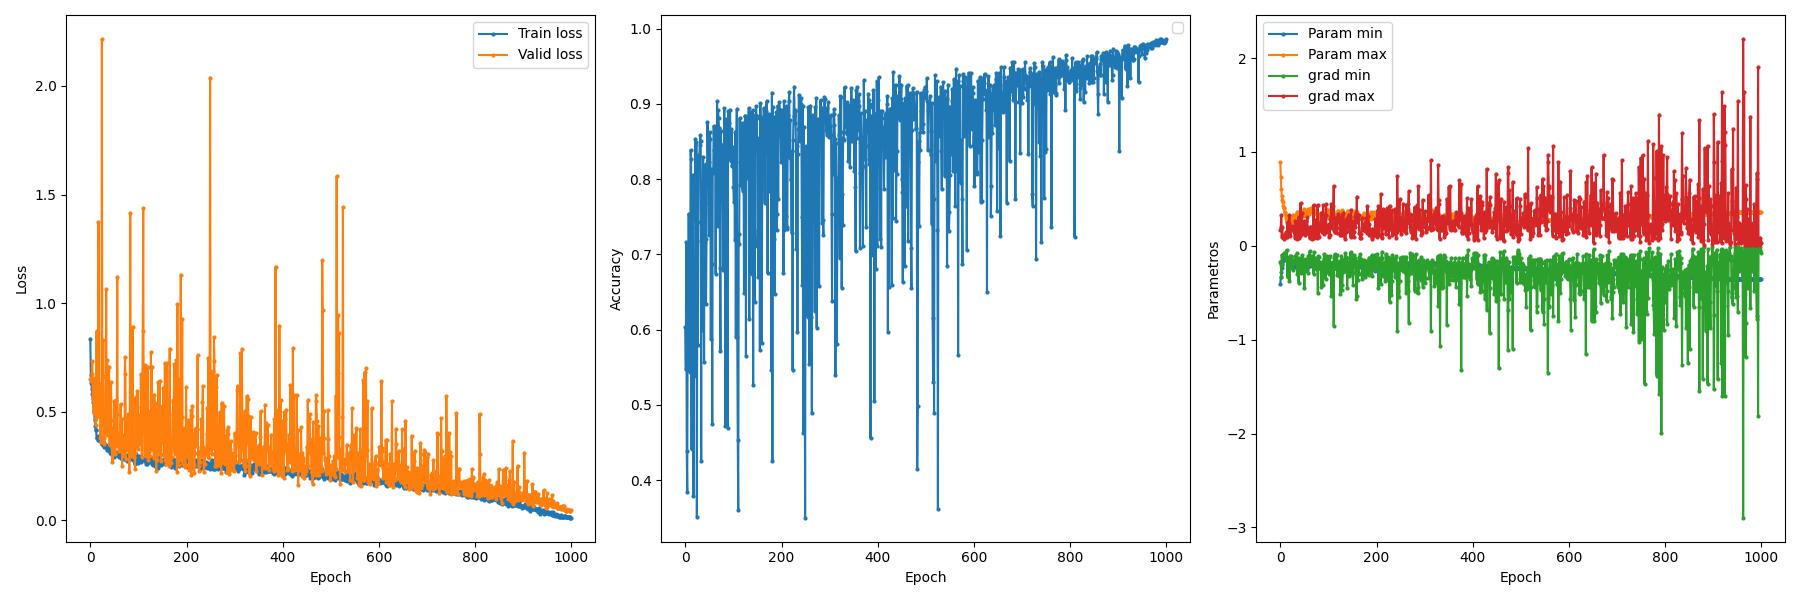

In [10]:
%matplotlib widget
train.show_log(logger)


In [43]:
# img, label = ds_valid[1000]

# plt.imshow(img)
# print(label)

print('tamanho da imagem:\n ', len(img))

print('imagens de treinamento:\n ', len(ds_train))

print('imagens de validação:\n ', len(ds_valid))

train_valid = len(ds_train) + len(ds_valid)
print('treinamento + validação:\n ', train_valid)

num_pics = 200 * 37
print('37 categorias x 200 imgs:\n ',num_pics)

test = num_pics - train_valid
print('Imagens de teste:\n ', test)

tamanho da imagem:
  224
imagens de treinamento:
  5880
imagens de validação:
  1469
treinamento + validação:
  7349
37 categorias x 200 imgs:
  7400
Imagens de teste:
  51


tensor([[-0.1200,  0.1200]], device='cuda:0', grad_fn=<AddmmBackward0>)
gato


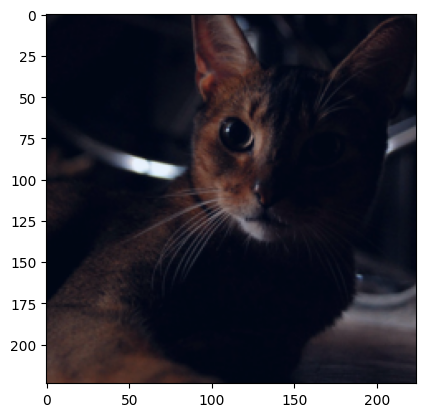

In [46]:
model.eval()

img, label = ds_valid[1300]
img = img.unsqueeze(0)
img = img.to('cuda')

with torch.no_grad():
        res = model(img)
        
animal = torch.argmax(res)

def trata_imagem(img: torch.Tensor) -> np.ndarray:
    # remove dimensao do batch
    img = img[0]
    
    # trata a imagem
    img -= img.min()
    img /= img.max()
    img *= 255
    img = img.to(torch.uint8)
    img = img.swapaxes(0, 1).swapaxes(1, 2)
    
    if img.is_cuda:
        img = img.detach().cpu()
    else:
        img = img.detach()
    
    return img.numpy()

# animal = 'gato' if animal==1 else 'cachorro'
if animal == 1:
    animal = 'gato'
else:
    animal = 'cahorro'

print(res)

img = trata_imagem(img)
print(animal)
plt.imshow(img)